In [1]:
pip install pyspark

Why do we need JAVA_HOME?

PySpark (the Python API for Apache Spark) internally depends on Java, because:

Spark itself is built on top of Scala, which runs on the Java Virtual Machine (JVM).

So before Spark starts, it needs to know where Java is installed on your system.

In [2]:
import os
os.environ["JAVA_HOME"]="/lib/jvm/java-11-openjdk-amd64"

In [3]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext

SparkConf → used to configure the Spark application (like name, number of threads, etc.)

SparkContext → the main entry point that connects your Python program to the Spark cluster (or local engine)
SparkConf

Think of it as the configuration blueprint for your Spark app.

You use it to specify:

Application name

Master URL (local or cluster)
conf = SparkConf().setAppName("MyApp").setMaster("local[*]")
setAppName("MyApp") → gives your Spark application a name (helpful for logs/UI)

setMaster("local[*]") → tells Spark to run locally on all available CPU cores

SparkContext

It’s the heart of any Spark application.

It connects your program to the Spark cluster.

It coordinates:

Task scheduling

Resource allocation

Communication between worker nodes

from pyspark.sql import SQLContext
What it does

SQLContext is built on top of SparkContext.

It provides the DataFrame API (higher-level abstraction than RDD).

It also enables SQL-like operations on structured data.


Difference Between SparkContext and SQLContext

| Context                       | Purpose                         | Used For                           |
| ----------------------------- | ------------------------------- | ---------------------------------- |
| **SparkContext (`sc`)**       | Core connection to Spark engine | Low-level RDD operations           |
| **SQLContext (`sqlContext`)** | Built on top of `sc`            | High-level DataFrame & SQL queries |

Note (Modern PySpark Way)

In newer PySpark versions (≥ 2.0), you usually don’t need to create SparkContext or SQLContext manually.

Instead, you use a SparkSession, which includes both:


from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MyApp").getOrCreate()

# access SparkContext and SQLContext if needed
sc = spark.sparkContext
sqlContext = spark

| Old Way        | New Way                       |
| -------------- | ----------------------------- |
| `SparkContext` | `spark.sparkContext`          |
| `SQLContext`   | `spark` itself (SparkSession) |



In [4]:
conf = SparkConf().set('spark.ui.port', '4050').setAppName("films").setMaster("local[2]")
sc = SparkContext.getOrCreate(conf=conf)
sqlContext = SQLContext(sc)
#sc.stop()

/usr/local/lib/python3.12/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


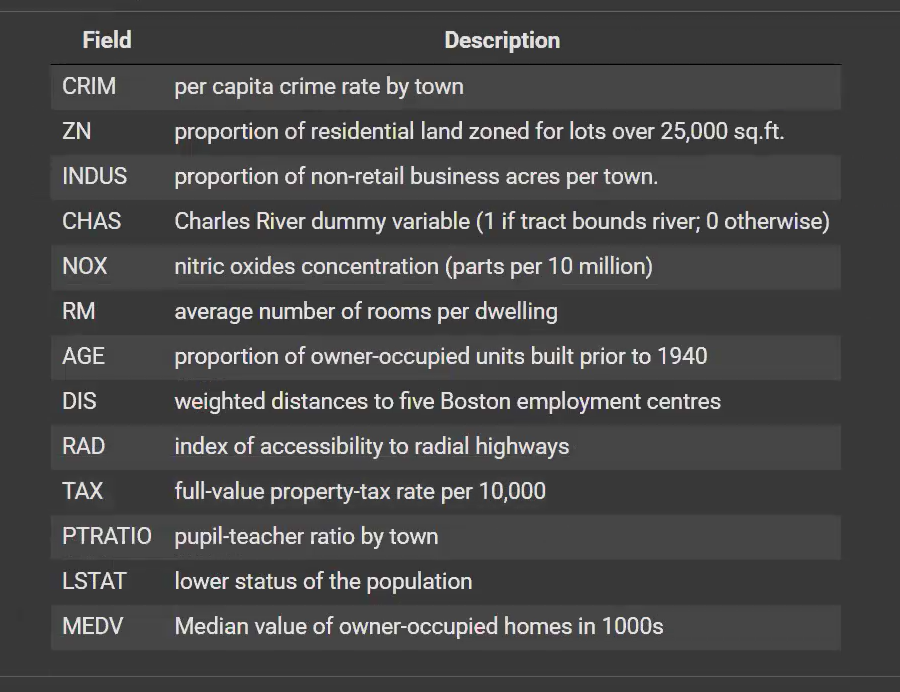

####Step 1: sqlContext.read

sqlContext is your SQLContext object
.read gives access to the DataFrameReader, which is used to load external data sources (like CSV, JSON, Parquet, etc.) into DataFrames.

####Step 2: .format('com.databricks.spark.csv')

This specifies which file format you’re loading.

'com.databricks.spark.csv' is the CSV data source plugin developed by Databricks.

####Step 3: .options(header='true', inferschema='true')

This sets additional options when reading the file.

① header='true'

Means the first row of your CSV file contains column names.

If it were 'false', Spark would treat the first row as data instead.


####inferschema='true'

Tells Spark to automatically detect data types for each column.

Without this, all columns would be read as strings (text).






In [7]:
house_df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('/content/Boston.csv')
house_df.show()

+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|  6|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|  7|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|  8|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|  9|0.21124|12.5| 7.

In [8]:
## Printing schema
house_df.cache()
house_df.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [9]:
house_df.show()

+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|  6|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|  7|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|  8|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|  9|0.21124|12.5| 7.

In [10]:
## Descriptive analysis
house_df.toPandas()

_c0     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0      1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1      2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2      3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3      4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4      5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..   ...      ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 15 columns]

In [14]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(house_df)
vhouse_df = vhouse_df.select(['features', 'medv'])
vhouse_df.show(3)

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
+--------------------+----+
only showing top 3 rows



In [21]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]
#train_df,test_df=vhouse_df.randomSplit([0.7,0.3])

In [22]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='medv', maxIter=10)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.10023583990077994,0.04776167546987635,-0.0010043165105237707,3.5024772866196656,-20.60432834255869,3.318496020505777,0.011158029361005703,-1.6640835244849355,0.38101957292705274,-0.013236666279429626,-0.9584449959334128,0.010655136881501054,-0.6365158623074489]
Intercept: 41.8778015114812


In [24]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4.785433
r2: 0.743756


In [26]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","medv","features").show(5)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|14.417068555608804|18.9|[0.0136,75.0,4.0,...|
| 33.11659305804595|31.6|[0.01432,100.0,1....|
| 37.43779140645928|44.0|[0.01538,90.0,3.7...|
| 29.99565414857323|32.9|[0.01778,95.0,1.4...|
|22.550586003294537|33.0|[0.01951,17.5,1.3...|
+------------------+----+--------------------+
only showing top 5 rows



In [27]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="medv",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.706849


In [28]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()


numIterations: 0
objectiveHistory: [0.0]
+-------------------+
|          residuals|
+-------------------+
| -6.247875544425927|
| 1.5221333681530496|
| -4.809571392978917|
| 2.9153709477128125|
| 4.7869687535983445|
|  9.250090581944306|
| -2.299377774388077|
| -2.573867143522918|
|  4.881956961499249|
|  5.456597955713271|
|-1.5761876026698332|
| 1.2802191995703183|
| 0.3274743037392547|
|  5.741943813847499|
|-0.6136325903265814|
| -3.734861818993366|
|-0.7100058323977656|
|  5.403745784005803|
| 3.1945114401056998|
|-0.7066782277039145|
+-------------------+
only showing top 20 rows



In [29]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","medv","features").show()

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|14.417068555608804|18.9|[0.0136,75.0,4.0,...|
| 33.11659305804595|31.6|[0.01432,100.0,1....|
| 37.43779140645928|44.0|[0.01538,90.0,3.7...|
| 29.99565414857323|32.9|[0.01778,95.0,1.4...|
|22.550586003294537|33.0|[0.01951,17.5,1.3...|
|43.135074669074164|50.0|[0.02009,95.0,2.6...|
|21.345896604932573|16.5|[0.02498,0.0,1.89...|
| 30.58295926652164|34.7|[0.02729,0.0,7.07...|
| 25.03700957548098|21.6|[0.02731,0.0,7.07...|
|29.246681778050355|25.0|[0.02875,28.0,15....|
|15.797980074169388|17.5|[0.03113,0.0,4.39...|
|28.696528253715528|33.4|[0.03237,0.0,2.18...|
|34.355435609853515|34.9|[0.03359,75.0,2.9...|
| 20.11647158681314|19.5|[0.03427,0.0,5.19...|
|29.237986928957625|24.1|[0.03445,82.5,2.0...|
| 28.80256744478884|22.0|[0.03537,34.0,6.0...|
|26.990557403260937|23.2|[0.03871,52.5,5.3...|
|27.830669046089188|22.0|[0.03932,0.0,3.41...|
|35.731430801

## Decision tree regression

In [30]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'medv')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 3.91012


In [31]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'medv')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="r2")
r2 = dt_evaluator.evaluate(dt_predictions)
print("R2 on test data = %g" % r2)

R2 on test data = 0.7878


In [32]:
lr_evaluator.evaluate(dt_predictions)

0.787800342926436

In [34]:
 dt_model.featureImportances

SparseVector(13, {0: 0.0497, 4: 0.0222, 5: 0.2195, 6: 0.0015, 7: 0.0755, 8: 0.0012, 9: 0.0027, 10: 0.0386, 12: 0.589})

In [35]:
house_df.take(1)

[Row(_c0=1, crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, black=396.9, lstat=4.98, medv=24.0)]

## Gradient-boosted tree regression

In [36]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'medv', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'medv', 'features').show(5)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|17.439197785595365|18.9|[0.0136,75.0,4.0,...|
|31.864894888506907|31.6|[0.01432,100.0,1....|
| 33.74325597394727|44.0|[0.01538,90.0,3.7...|
| 33.48526863751012|32.9|[0.01778,95.0,1.4...|
|25.147880670503866|33.0|[0.01951,17.5,1.3...|
+------------------+----+--------------------+
only showing top 5 rows



In [37]:
gbt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 3.61512


In [38]:
gbt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="r2")
r2 = gbt_evaluator.evaluate(gbt_predictions)
print("R2 Score on test data = %g" % r2)

R2 Score on test data = 0.818611
